# TP2 - TEMA: ECUACIONES NO LINEALES
## PARTE 1

1) Se está tratando de localizar, con mayor precisión, la raíz de 𝒇(𝒙)=𝒙^−𝟏−𝒕𝒈(𝒙) que está entre $[0.5, \pi/2)$

  **a) Graficar la función.**

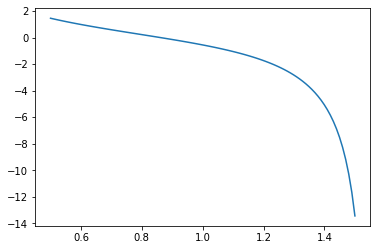

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# n = np.pi/2 - 0.0001
n = 1.5
x = np.linspace(0.5, n, 100)

y = x**(-1) - np.tan(x)

plt.plot(x,y)

+ la función tiene una raíz en $x \approx 0.860333589019380...$
+ no está definida para $n\pi/2$ decrece por izquierda asintóticamente para este valor

**b) Método de la Bisección.** ¿Qué características tiene este método? En cada iteración calcule el error obtenido.

In [89]:
import numpy as np

def f(a):
    return a**(-1)-np.tan(a)

a, b = 0.5, 1.5
itmax = 20

print('{:^4s}'.format("It."), '{:^7s}'.format("a"), '{:^7s}'.format("b"), '{:^7s}'.format("m"), '{:^13s}'.format("f(a)*f(b)"), '{:<8s}'.format("error"))

for i in range(itmax):
    
    m = (a+b)/2    
    control = f(a)*f(m)
    
    print('{:^4d}'.format(i+1), '{:<7.3f}'.format(a), '{:<7.3f}'.format(b), '{:<7.3f}'.format(m), '{:^13.3f}'.format(control), end="")

    if control > 0:
        a = m
    else:
        b = m
    
    print(np.abs(a-b))
    


It.     a       b       m      f(a)*f(b)   error   
 1   0.500   1.500   1.000      -0.810    0.5
 2   0.500   1.000   0.750       0.584    0.25
 3   0.750   1.000   0.875      -0.022    0.125
 4   0.750   0.875   0.812       0.070    0.0625
 5   0.812   0.875   0.844       0.011    0.03125
 6   0.844   0.875   0.859       0.000    0.015625
 7   0.859   0.875   0.867      -0.000    0.0078125
 8   0.859   0.867   0.863      -0.000    0.00390625
 9   0.859   0.863   0.861      -0.000    0.001953125
 10  0.859   0.861   0.860      -0.000    0.0009765625
 11  0.859   0.860   0.860       0.000    0.00048828125
 12  0.860   0.860   0.860       0.000    0.000244140625
 13  0.860   0.860   0.860       0.000    0.0001220703125
 14  0.860   0.860   0.860       0.000    6.103515625e-05
 15  0.860   0.860   0.860       0.000    3.0517578125e-05
 16  0.860   0.860   0.860      -0.000    1.52587890625e-05
 17  0.860   0.860   0.860       0.000    7.62939453125e-06
 18  0.860   0.860   0.860       0.

+ Es un método cerrado (siempre converge)
+ El error decrece exponencialmente (inversamnete proporcional a 2^n)
+ Luego de 10 iteraciones se reduce el la amplitud de la cota a |Δx|<1E^-3

**c) Método de la Secante.** ¿Qué características tiene este método? Calcule el error cometido en cada iteración.

In [90]:
import numpy as np

def f(x):
    return x**(-1)-np.tan(x)

a, b = 0.5, 1.5
itmax = 8

print('{:^4s}'.format("It."), '{:^7s}'.format("Xn-1"), '{:^7s}'.format("Xn"), '{:^7s}'.format("Xn+1"), '{:<8s}'.format("error"))

for i in range(itmax):

    x = b - f(b)*(b-a)/(f(b)-f(a))
    
    print('{:^4d}'.format(i+1), '{:<7.3f}'.format(a), '{:<7.3f}'.format(b), '{:<7.3f}'.format(x), np.abs(b-x))
    
    a = b
    b = x


It.   Xn-1     Xn     Xn+1   error   
 1   0.500   1.500   0.598   0.902360727076585
 2   1.500   0.598   0.660   0.062080749823046566
 3   0.598   0.660   0.842   0.1820202488718804
 4   0.660   0.842   0.860   0.01855479413028338
 5   0.842   0.860   0.860   3.872861068499045e-05
 6   0.860   0.860   0.860   2.0534241373937334e-07
 7   0.860   0.860   0.860   2.483124816876625e-12
 8   0.860   0.860   0.860   0.0


+ Es un método abierto (puede diverger)
+ En las primeras iteraciones el valor del error aumenta y disminuye (oscila).
+ Luego de la 4ta iteración se redujo mucho el error.

**d) Bisección Vs. Secante**

+ En comparación con la Bisección, con el método de Secante se llega mucho más rápido a la convergencia.
+ La principal desventaja de la Secante es que puede diverger, en cambio la Bisección siempre converge.

**e) Método de Regula Falsi Vs. Método de la Secante.**

In [91]:
import numpy as np

def f(x):
    return x**(-1)-np.tan(x)

### Método de la Secante:
def secante(a, b, itmax, eps):
    it = 0
    error = eps + 1
    
    while it <= itmax and error > eps:
        it = it + 1
        x = b - f(b)*(b-a)/(f(b)-f(a)) # a = b - f(b)*(b-a)/(f(b)-f(a))
        error = np.abs(b-x)            
        a = b                          # b = a
        b = x
    if it > itmax:
        print("No converge")
    else: 
        print("La raíz es: ", x, "Error: ", error, " N° de iteraciones: ", it)

### Método Regula Falsi:
def regulaFasi(a, b, itmax, eps):
    
    it = 0
    error = eps + 1    
    
    while it <= itmax and error > eps:
        it = it + 1
        x = b - f(b)*(b-a)/(f(b)-f(a))
        
        if f(a)*f(b)>0:
            a = x
        else:
            b = x
            
        error = np.abs(b-a)
            
    if it > itmax:
        print("No converge")
    else: 
        print("La raíz es: ", x, "Error: ", error, " N° de iteraciones: ", it)


### implementación...

a, b  = 0.5, 1.5
itmax = 50
eps   = 1E-6

print("-----Método de la Secante-----")
secante(a, b, itmax, eps)

print("\n----- Método Regula Falsi -----")
regulaFasi(a, b, itmax, eps)

#0.860333589019380

-----Método de la Secante-----
La raíz es:  0.8603335890168966 Error:  2.0534241373937334e-07  N° de iteraciones:  6

----- Método Regula Falsi -----
La raíz es:  0.8603335890193797 Error:  0.0  N° de iteraciones:  12


+ Con el método de la secante se llega al valor deseado con menos iteraciones.


+ De teoría:

<table>
    <tr>
        <th>Regular Falsi</th>
        <th>Secante</th>
    </tr>
    <tr>
        <td>Convergencia lenta. Pero es útil como aproximación inicial de otros métodos</td>
        <td>Es más rápido que otros métodos</td>
    </tr>
    <tr>
        <td>Usa toda la información que tiene (abscisa y ordenada)</td>
        <td>Es necesario que f(x) cambie de signo</td>
    </tr>
    <tr>
        <td style="color:green">Siempre converge</td>
        <td style="color:red">Puede diverger</td>
    </tr>
    <tr>
        <td>Necesita un intervalo que contenga a la raíz.</td>
        <td></td>
    </tr>
</table>

**2) Método de Newton–Raphson.** ¿Qué ocurre si ejecuta el algoritmo con la función $f(x) = x_3 − x$ , con el valor inicial $x_0= \sqrt{1/5}$?

In [2]:
import numpy as np

def f(x):
    return x**3-x ##raíces en x=0, x=-1, x=1 

def df(x):
    return 3*(x**2)-1

### Método de Newton–Raphson:
def newtonRaphson(a, itmax, eps):
    it = 0
    error = eps + 1
    
    while it <= itmax and error > eps:
        it = it + 1
        b = a - f(a)/df(a)
        error = np.abs(b-a)
        a = b

    if it > itmax:
        print("No converge")
    else: 
        print("La raíz es: ", '{:.6f}'.format(b), "Error: ", error, " N° de iteraciones: ", it)
        
### implementación...
x     = np.sqrt(1/5)
itmax = 20
eps   = 1E-4

print("x = √1/5")
newtonRaphson(x, itmax, eps)
# print("\nx = √1/3")
# newtonRaphson(np.sqrt(1/3), itmax, eps)
print("\nx = -2")
newtonRaphson(-2, itmax, eps)
print("\nx = 0.01")
newtonRaphson(0.01, itmax, eps)
print("\nx = 0.5")
newtonRaphson(0.5, itmax, eps)
print("\nx = 7")
newtonRaphson(7, itmax, eps)

x = √1/5
No converge

x = -2
La raíz es:  -1.000000 Error:  1.2353066562997839e-06  N° de iteraciones:  6

x = 0.01
La raíz es:  0.000000 Error:  2.0006001800712403e-06  N° de iteraciones:  2

x = 0.5
La raíz es:  -1.000000 Error:  0.0  N° de iteraciones:  2

x = 7
La raíz es:  1.000000 Error:  1.097711350173114e-05  N° de iteraciones:  9


+ En x = √1/5 la pendiente de la recta tangente se aproxima a cero.
+ En x = √1/3 no se puede usar el método porque en ese punto df(x)=0.
+ Para un valor inicial más alejado a la raíz, el número de iteraciones aumenta. 
+ El método puede no converger, si el valor inicial no es próximo a la raíz.
+ Una posible forma de trabajo es inicialmente aproximar la funcion a la raíz por medio de otro método primero.
+ En algunos casos, si no se conoce f, es posible conseguir una función equivalente a partir de datos cargados.

3) Realice un programa del Método de Newton–Raphson para encontrar la raíz de:

$i)\>\>\>f(x) = \sin{x} - \frac{1}{2}\sqrt{x}$

$ii)\>\>g(x) = \tan{x} - 0.5 x$

$iii)\>h(x) = x^{10} - 1$

$iv)\>\>$ la raíz múltiple de $f(x) = x^3 - 5 x^2 + 7 x - 3$

$v)\>\>\>f(x) = x^2 – x – 2.5$

    a) Analice qué dificultades podría tener en los cálculos de algunas de las raíces pedidas.
    b) Compare y saque conclusiones.

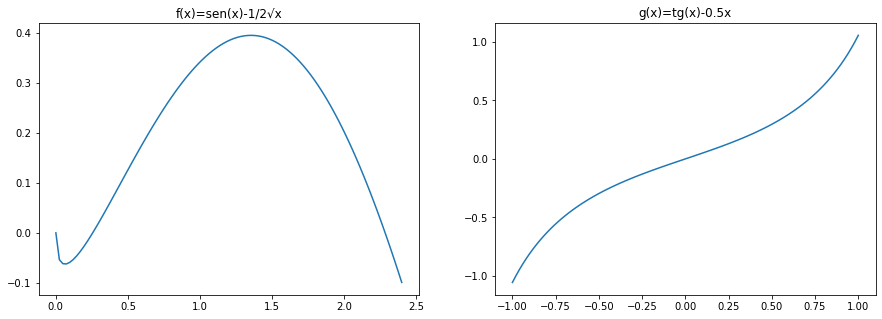

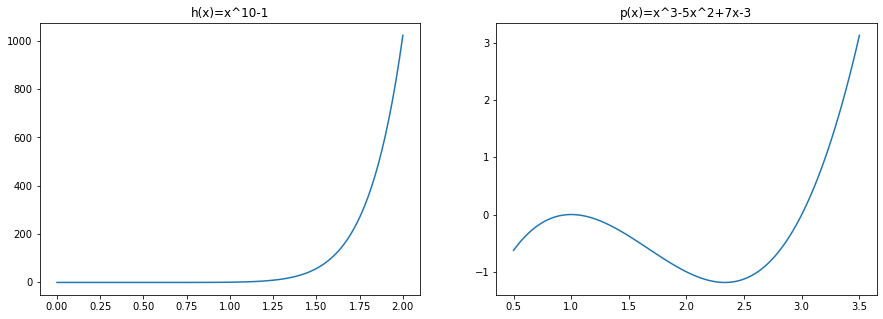

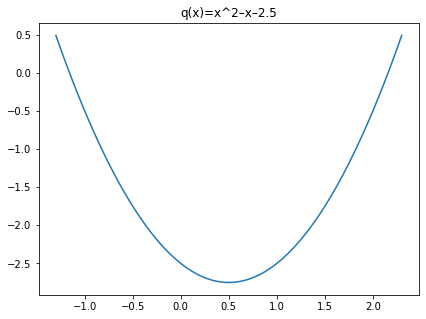

In [4]:
import matplotlib.pyplot as plt
import numpy as np

### i ###
def f(x):
    return np.sin(x)-np.sqrt(x)/2 #roots: x = 0.255512... x = 2.28476...
def df(x):
    return np.cos(x)-1/(4*np.sqrt(x))

x1 = np.linspace(0, 2.4, 100)
y1 = f(x1)

### ii ###
def g(x):
    return np.tan(x)-x/2 #roots: x = 0, x = +-4.274782...
def dg(x):
    return 1/(np.cos(x))**2-1/2

x2 = np.linspace(-1, 1, 100)
y2 = g(x2)

### iii ###
def h(x):
    return x**10-1 #roots: x = +-1
def dh(x):
    return 10*(x**9)

x3 = np.linspace(0, 2, 100)
y3 = h(x3)

### iv ###
def p(x):
    return x**3-5*(x**2)+7*x-3 #roots: x = 1, X = 3
def dp(x):
    return 3*(x**2)-10*x+7

x4 = np.linspace(0.5, 3.5, 100)
y4 = p(x4)

### v ###
def q(x):
    return x**2-x-2.5 #roots: x = 0.5*(1+-sqrt(11))
def dq(x):
    return 2*x-1

x5 = np.linspace(-1.3, 2.3, 100)
y5 = q(x5)

plt.figure(1, (15, 5))
plt.subplot(121).title.set_text('f(x)=sen(x)-1/2√x')
plt.plot(x1,y1)
plt.subplot(122).title.set_text('g(x)=tg(x)-0.5x')
plt.plot(x2,y2)

plt.figure(2, (15, 5))
plt.figure(2, (15, 5))
plt.subplot(121).title.set_text('h(x)=x^10-1')
plt.plot(x3,y3)
plt.subplot(122).title.set_text('p(x)=x^3-5x^2+7x-3')
plt.plot(x4,y4)

plt.figure(3, (15, 5))
plt.subplot(121).title.set_text('q(x)=x^2–x–2.5')
plt.plot(x5, y5)


In [5]:
### Método de Newton–Raphson con f() y df/d de entrada

def newtonRaphsonf(a, itmax, eps, f, df):
    it = 0
    error = eps + 1
    
    while it <= itmax and error > eps:
        it = it + 1
        b = a - f(a)/df(a)
        error = np.abs(b-a)
        a = b
        
    if it > itmax:
        print("No converge")
    else: 
        print("La raíz es: ", '{:.6f}'.format(b), "Error: ", error, " N° de iteraciones: ", it)

### implementación...
itmax = 40
eps   = 1E-4
       

### Figura 1) $f(x) = \sin{x} - \frac{1}{2}\sqrt{x}$
+ 2 ceros cercanos (próximos a x=0)
+ en x = 1.35428... presenta un max (df=0), el método da error
+ lo mismo ocurre en x = 0.0627467, donde se presenta un mín 

In [6]:
# newtonRaphsonf(0  , itmax, eps, f, df)  #roots: x = 0.25551... x = 2.28476...
# newtonRaphsonf(1  , itmax, eps, f, df)
newtonRaphsonf(0.5, itmax, eps, f, df)
newtonRaphsonf(2.5, itmax, eps, f, df)

La raíz es:  0.255512 Error:  1.34435938152766e-05  N° de iteraciones:  3
La raíz es:  2.284761 Error:  9.633283645049673e-05  N° de iteraciones:  3


### Figura 2) $g(x) = \tan{x} - 0.5 x$
+ asíntota en $x=\pi/2\approx1.57$, el método se demora en converger. Gráficamente, se trazan muchas rectas tangentes hasta llegar al punto. 
+ punto de inflexión en el cero de la función x=0, el método se demora en alcanzar la convergencia.

In [7]:
newtonRaphsonf(0.1, itmax, eps, g, dg) #roots: x = 0, x = +-4.274782...
newtonRaphsonf(1.57, itmax, eps, g, dg)

La raíz es:  0.000000 Error:  3.0494883074879547e-09  N° de iteraciones:  3
La raíz es:  0.000000 Error:  6.909772570762767e-07  N° de iteraciones:  15


### Figura 3) $h(x) = x^{10} - 1$
+ pendiente próxima a cero por izquierda, conviene usar un punto de inicio x0 a la derecha de la raíz para que el método sea más rápido 

In [97]:
newtonRaphsonf(0.1, itmax, eps, h, dh) #roots: x = +-1
newtonRaphsonf(0.6, itmax, eps, h, dh)
newtonRaphsonf(1.4,   itmax, eps, h, dh)

No converge
La raíz es:  1.000000 Error:  8.539065630142062e-06  N° de iteraciones:  27
La raíz es:  1.000000 Error:  3.8126681116690264e-06  N° de iteraciones:  7


### Figura 4) $f(x) = x^3 - 5 x^2 + 7 x - 3$
+ ceros dobles en x=1 y un cero simple en x=3
+ en x=1 la función tiene máx relativo y en x=2.333... un mínimo. El método se demora para converger.

In [14]:
newtonRaphsonf(0, itmax, eps, p, dp) #roots: x = 1, X = 3
newtonRaphsonf(1.5, itmax, eps, p, dp)
# newtonRaphsonf(2.0, itmax, eps, p, dp)
newtonRaphsonf(2.1, itmax, eps, p, dp)
newtonRaphsonf(3.9, itmax, eps, p, dp)

La raíz es:  0.999912 Error:  8.824468365387084e-05  N° de iteraciones:  14
La raíz es:  1.000088 Error:  8.752567165815073e-05  N° de iteraciones:  12
La raíz es:  0.999912 Error:  8.824468261314777e-05  N° de iteraciones:  13
La raíz es:  3.000000 Error:  2.987608096693961e-05  N° de iteraciones:  5


### Figura 5) $f(x) = x^2 – x – 2.5$
+ ceros x=-1.16 y x=2.16
+ en x=0.5 la función tiene un mínimo absoluto. Si se toma el valor inicial cerca de este punto el método se demora.


In [99]:
newtonRaphsonf(-2, itmax, eps, q, dq) #roots: x = 0.5*(1+-sqrt(11))
newtonRaphsonf(0.4, itmax, eps, q, dq)
newtonRaphsonf(0.499, itmax, eps, q, dq)
newtonRaphsonf(0.501, itmax, eps, q, dq)
newtonRaphsonf(3, itmax, eps, q, dq)

La raíz es:  -1.158312 Error:  9.344732902594188e-06  N° de iteraciones:  4
La raíz es:  -1.158312 Error:  6.429582046774129e-07  N° de iteraciones:  8
La raíz es:  -1.158312 Error:  8.691657171766565e-09  N° de iteraciones:  15
La raíz es:  2.158312 Error:  8.691656727677355e-09  N° de iteraciones:  15
La raíz es:  2.158312 Error:  9.344732903038278e-06  N° de iteraciones:  4


**Conclusión:** el comportamiento del método depende de la forma de la función. Con valor inicial en los puntos donde la derivada de la función es cero no se puede aplicar el método, y con un valor de la derivada es muy pequeño (por ej. múltiples ceros) puede o no converger y el número de iteraciones puede ser elevado. Lo mismo ocurre si el valor inicial está cerca de una asíntota, o muy alejado de la raíz que se quiere obtener.

No puedo iniciar el valor en el punto de la raíz, cuando su derivada es cero (no puedo dividir por cero)
Cuando las raíces son multiples, al rededor de las mismas la derivada es muy pequeña, xn+1=xn-f/f', el valor de 1/f' es muy grande.